**Submitted by: Group G4**<br>
**2020-06-02**

![](airindia.png)
<h1 style="text-align:center;"> Air Fare prediction Analysis</h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Business Understanding](#0)<br>
2. [Data Understanding](#2)<br>
3. [Data Preparation](#4)<br>
4. [Modeling](#0)<br>
2. [Evaluation](#2)<br>
3. [Deployment](#4)<br>
</div>
<hr>

### Data Science Life Cycle

Microsoft & IBM methodologies are adopting in recent time for solving Data Science & Analytic problems. We used IBM Data Science Methodology. Due to more steps in this methodology, we could cleary identified problems & their's solutions clearly. 

![](micro-ibm.png)

## Business Understanding  <a id="0"></a>
This is the **Data Science Methodology**, a flowchart that begins with business understanding.<br>
Q: What is the problem that we are tried to solve?    

Air travel is the safest mode of transport in any times. Passengers are therefore likely to switch in large numbers away from rail and car to air travel. India’s commercial aircraft are around 670 & skies are empty now.India’s aviation system is going to boom because of oil prices are decreased. In this time, Passengers want to fly in cheaper rate but companies want to generate valuable revenue at same time. Due to this, there has fluctuations in price of Air (AirFare) over time to get seat. This is the problem to solve by building a predictive model by exploring previous airfare data.

**Business objective-** To predict airfare, as domestic air travel is popular these days in India with different air ticket booking channels, travelers are trying to make sense and understand how airlines price their tickets over time. 
We want you to explore previous airfare data and build a model to predict the price fluctuations over time so that the consumer could benefit from it. We want you to identify dependency over many endogenous variables. You are free to look at different models from the space of forecasting and regression.

## Analytic Approach
<li> How can we used data to answer the question?

After we have acquired the data, we have done the followings:

Diagnosed data quality:
<li>If there has a problem with data quality.</li>
<li>The data has corrected.</li>
<li>Explored data to understand the data and find scenarios for performing the analysis.</li>
<li>Identify dependency over many endogenous variables.</li>
<li>Compared different models to evaluate best model.</li>

The **pycaret** package made these steps fast and easy:

<li>Performed data diagnosis or automatically generated a data diagnosis report.</li>
<li>Discovered data in a variety of ways, and automatically generated EDA report.</li>
<li>Imputated missing values and outliers, resolved skewed data. And generated an automated report to support it.</li>

Particularly in data exploration and data wrangling, it increased the efficiency of the pycaret package.

## Data Understanding

 Import necessaries library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

Read given data by help of pandas function 

In [2]:
df = pd.read_csv('C:\\Users\\Raja\\Desktop\\project\\project2020\\air_fair.csv')

Parse strings to datetime type 

In [3]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, infer_datetime_format=True)
index_df=df.set_index(['InvoiceDate'])

InvoiceData index sorted

In [4]:
index_df.sort_values(by='InvoiceDate').head()

,NetFare,ProductType,ItineraryType
InvoiceDate,,,
2018-01-04 08:26:00,8222.0,Air,Domestic
2018-01-04 09:17:00,3418.0,Air,Domestic
2018-01-04 09:54:00,6708.0,Air,Domestic
2018-01-04 12:00:00,3625.0,Air,Domestic
2018-01-04 12:36:00,3099.0,Air,Domestic


### Descriptive Statistical Analysis

Show size of dataframe 

In [5]:
index_df.size

835398

Show unique value of ProductType 

In [6]:
index_df.ProductType.unique()

array(['Other Product', 'Air', 'Charge', 'Hotel', 'Air Cancellation',
       'Other Product Cancellation', 'payment', 'Hotel Cancellation',
       'refund', nan, 'Air Debit Note', 'Hotel Debit Note', 'Air Loss',
       'Other Product Debit Note', 'Hotel Loss'], dtype=object)

Show unique value of Itinerary column

In [7]:
index_df.ItineraryType.unique()

array(['Domestic', nan, 'International'], dtype=object)

Show the statistical calculations of dataframe

In [8]:
index_df.describe().round(2)

,NetFare
count,217576.00
mean,4266.91
std,9803.14
min,-497324.00
25%,10.00
50%,3501.00
75%,5944.00
max,497678.00


Show the general info about dataframe

In [9]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278466 entries, 2018-01-12 11:43:00 to 2019-10-06 22:30:00
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NetFare        217576 non-null  float64
 1   ProductType    278464 non-null  object 
 2   ItineraryType  245689 non-null  object 
dtypes: float64(1), object(2)
memory usage: 8.5+ MB


## Data Preparation

<h4>Evaluating for Missing Data</h4>
There are two methods to detect missing data:
<ol>
 <li><b>.isnull()</b></li>
 <li><b>.notnull()</b></li>
</ol>   

Find missing value by Boolean method:
**"True"** stands for missing value, while **"False"** stands for not missing value.

In [10]:
missing_value = index_df.isnull()
missing_value

,NetFare,ProductType,ItineraryType
InvoiceDate,,,
2018-01-12 11:43:00,False,False,False
2018-01-12 11:43:00,False,False,False
2018-01-12 13:01:00,False,False,False
2018-01-12 13:10:00,False,False,False
2018-11-30 14:30:00,False,False,False
...,...,...,...
2019-10-06 20:45:00,False,False,False
2019-10-06 21:39:00,False,False,False
2019-10-06 22:18:00,False,False,False


### Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column.<br>
**"True" stands for missing value, while "False" stands for not missing value**

In [11]:
for column in missing_value.columns.values.tolist():
    print(column)
    print (missing_value[column].value_counts())
    print("") 

NetFare
False    217576
True      60890
Name: NetFare, dtype: int64

ProductType
False    278464
True          2
Name: ProductType, dtype: int64

ItineraryType
False    245689
True      32777
Name: ItineraryType, dtype: int64



Based on the summary above, each column has 278466 rows of data, three columns containing missing data:
<ol>
    <li>"NetFare": 60890 missing data</li>
<li>"ProductType": 2 missing data</li>
<li>"ItineraryType": 32777 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
       </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Drop rows:</b>
<ul>
    <li>"NetFare": 60890 missing data, drop whole rows, they are totally empty</li>
    <li>"ProductType": 2 missing data, drop them , among of them 2 are not so necessary</li>
    <li>"ItineraryType": 32777 missing data, drop them , they are totally empty, we have huge data</li>
</ul>

Show data types

In [12]:
index_df.dtypes

NetFare          float64
ProductType       object
ItineraryType     object
dtype: object

Drop missing values **[NetFare]** in observations, they are completly empty 

In [13]:
index_df.dropna(subset=["NetFare"], axis=0, inplace=True)

Drop missing values **[ProductType]** in observations, the two rows are negelegible 

In [14]:
index_df.dropna(subset=["ProductType"], axis=0, inplace=True)

Drop missing values **[ItineraryType]** in observations, they are not very sensitive 

In [15]:
index_df.dropna(subset=["ItineraryType"], axis=0, inplace=True)

Reset index, because we droped many rows & sorted

In [17]:
index_df.reset_index().sort_values(by='InvoiceDate').head()

,InvoiceDate,NetFare,ProductType,ItineraryType
93220,2018-01-04 08:26:00,8222.0,Air,Domestic
93221,2018-01-04 09:17:00,3418.0,Air,Domestic
93222,2018-01-04 09:54:00,6708.0,Air,Domestic
93223,2018-01-04 12:00:00,3625.0,Air,Domestic
93224,2018-01-04 12:36:00,3099.0,Air,Domestic


**Final Cleaned** data

In [18]:
missing_data_cleaned = index_df.isnull()

**"True" stands for missing value, while "False" stands for not missing value**

In [19]:
for column in missing_data_cleaned.columns.values.tolist():
    print(column)
    print (missing_data_cleaned[column].value_counts())
    print("") 

NetFare
False    184800
Name: NetFare, dtype: int64

ProductType
False    184800
Name: ProductType, dtype: int64

ItineraryType
False    184800
Name: ItineraryType, dtype: int64



RAW Data observations=**278466**, CLEANED Data observations=**184800**, USELESS Data observations=**93666**

**Box Plot** to find out the outliers:

In [20]:
import seaborn as sns

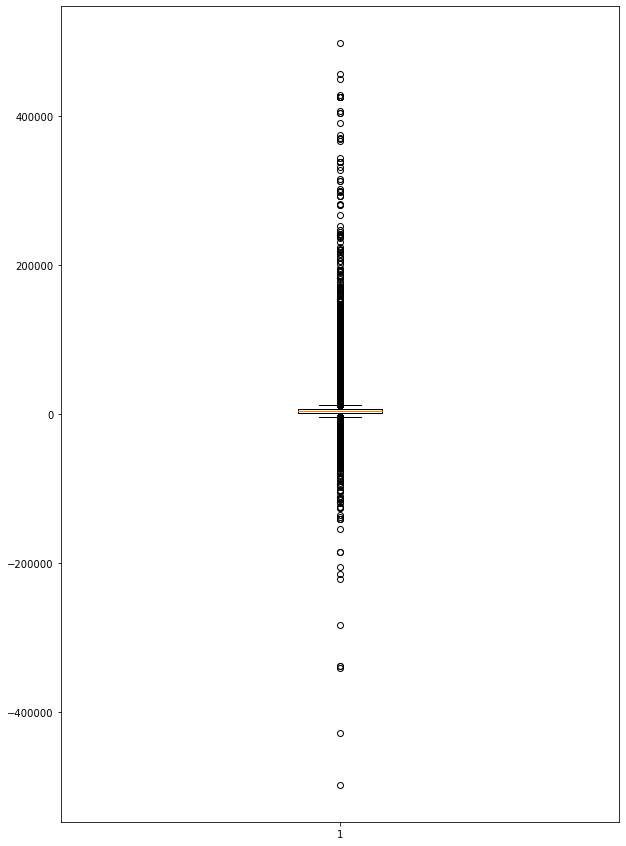

In [22]:
fig, ax1=plt.subplots()
fig.set_size_inches(10,15)
plt.boxplot(index_df["NetFare"])
plt.show()

↑ Box-plot shows much outliers both sides, it has to remove, actually outliers makes execution lazy and make noise.

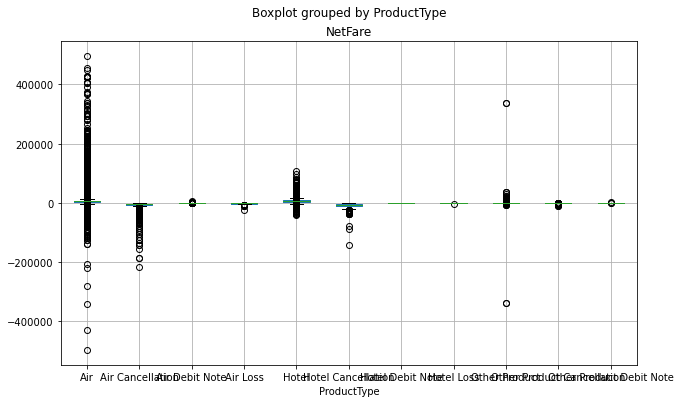

In [23]:
index_df.boxplot(column='NetFare', by='ProductType')

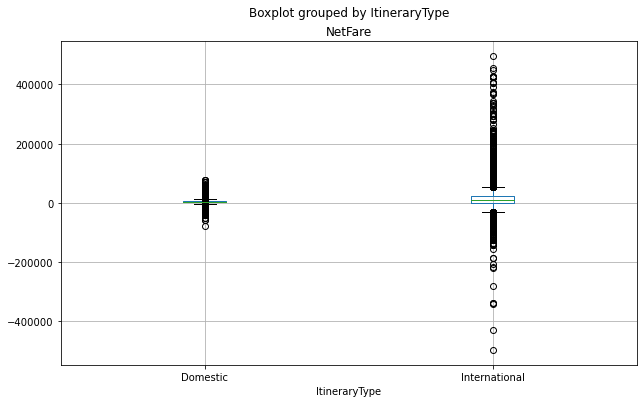

In [24]:
index_df.boxplot(column='NetFare', by='ItineraryType')

↑ Compared with International NetFare, Domestic airfare has less outliers, advised to remove outliers in both variables

Histogram plot of NetFare

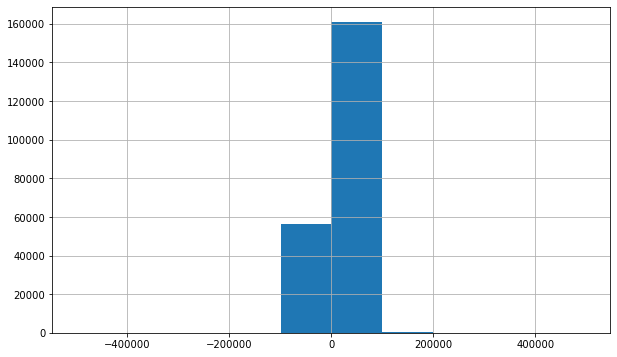

In [25]:
df.NetFare.hist()

↑ By graph can be analysed that negative values are also existed and NetFare nearly 58000.

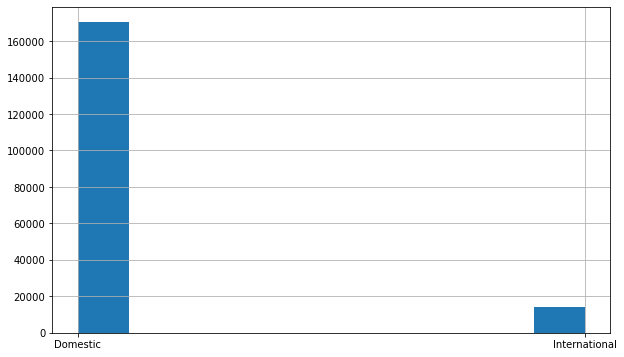

In [26]:
index_df.ItineraryType.hist()

↑ Domestic AirFare consists of huge amounts.

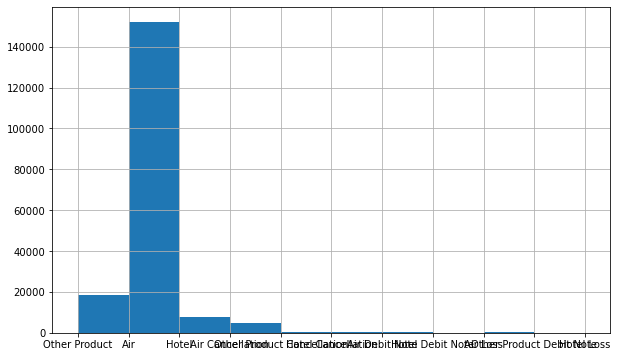

In [27]:
index_df.ProductType.hist()

↑ By graph can be conclude that Sub-type Air of ProductType plays main role in a group. It means correlation with NetFare should be strong.

#### Identifying Outliers with Interquartile Range (IQR)

In [28]:
Q1 = index_df.quantile(0.25)
Q3 = index_df.quantile(0.75)
IQR = Q3 - Q1  
print(IQR)

NetFare    4314.0
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [29]:
print((index_df  < (Q1 - 1.5 * IQR)) | (index_df  > (Q3 + 1.5 * IQR)))

                     ItineraryType  NetFare  ProductType
InvoiceDate                                             
2018-01-12 11:43:00          False    False        False
2018-01-12 11:43:00          False    False        False
2018-01-12 13:01:00          False    False        False
2018-01-12 13:10:00          False    False        False
2018-11-30 14:30:00          False    False        False
...                            ...      ...          ...
2019-10-06 20:45:00          False    False        False
2019-10-06 21:39:00          False    False        False
2019-10-06 22:18:00          False    False        False
2019-10-06 22:30:00          False    False        False
2019-10-06 22:30:00          False    False        False

[184800 rows x 3 columns]


#### Identifying skewness 

In [30]:
print(df['NetFare'].skew())
df['NetFare'].describe()

11.686463514862059


count    217576.000000
mean       4266.905212
std        9803.137297
min     -497324.000000
25%          10.000000
50%        3501.000000
75%        5944.000000
max      497678.000000
Name: NetFare, dtype: float64

↑ Data is highly right skewed (11.68). Max value is 497678.It is due to outliers. So, there has necessary to delete outliers. 

### IQR Score
We use the IQR method to delete outliers from records

In [31]:
index_outlier = index_df[~((index_df < (Q1 - 1.5 * IQR)) |(index_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(index_outlier.shape)

(170117, 3)


In [34]:
index_outlier.reset_index().sort_values(by='InvoiceDate')

,InvoiceDate,NetFare,ProductType,ItineraryType
86275,2018-01-04 08:26:00,8222.0,Air,Domestic
86276,2018-01-04 09:17:00,3418.0,Air,Domestic
86277,2018-01-04 09:54:00,6708.0,Air,Domestic
86278,2018-01-04 12:00:00,3625.0,Air,Domestic
86279,2018-01-04 12:36:00,3099.0,Air,Domestic
...,...,...,...,...
65135,2019-12-05 23:56:00,5532.0,Air,Domestic
65134,2019-12-05 23:56:00,5532.0,Air,Domestic
65133,2019-12-05 23:56:00,5532.0,Air,Domestic
65136,2019-12-05 23:56:00,5532.0,Air,Domestic


<p>Among CLEANED Data observations=**184800**, after delation of outlier REMAINDER Data observations=**170117** </p>

### Re-Check outliers by Box-Plot 

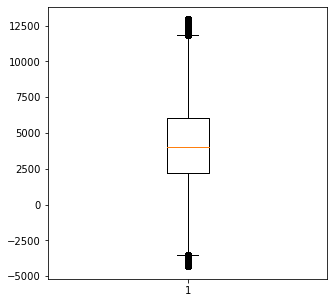

In [35]:
fig, ax1=plt.subplots()
fig.set_size_inches(5,5)
plt.boxplot(index_outlier["NetFare"])
plt.show()

↑ **Oah..**, we got box plot with free outliers. Its great

In [36]:
print(index_outlier['NetFare'].skew())
index_outlier['NetFare'].describe()

0.10733512294966292


count    170117.000000
mean       4138.070657
std        3034.224226
min       -4315.000000
25%        2243.000000
50%        4044.000000
75%        6084.000000
max       12941.000000
Name: NetFare, dtype: float64

↑ See the Skewness=0.10, nearly 0. Data is normal distribution.

<b>Good!</b> Now, we obtain the dataset with no missing values, no outliers , no dispersion & sort indexed.

### Data Normalization
**Target:** Normalize variables so their value ranges from 0 to 1.<br>
**Approach:** replace original value by (original value)/(maximum value).<br>
We have not such columns having big values which affects our target[NetFare], that's why we did not normalize data.

In [ ]:
#index_outlier.NetFare = index_outlier.NetFare/index_outlier.NetFare.max()
#index_outlier.head().round(4)

### Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Histogram of NetFare

Text(0.5, 1.0, 'NetFare-Counts Plot')

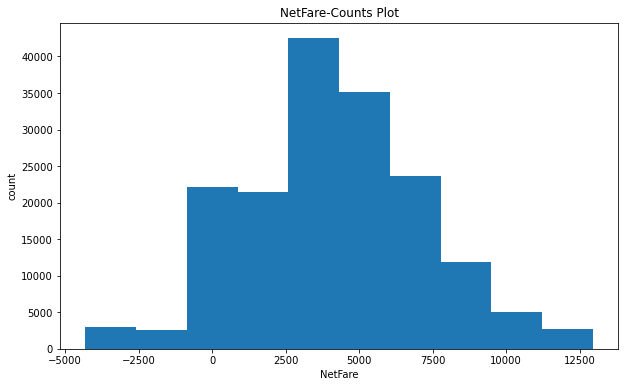

In [38]:
plt.hist(index_outlier["NetFare"])
plt.xlabel("NetFare")
plt.ylabel("count")
plt.title("NetFare-Counts Plot")

↑ Above plot shows that NetFare between 2500-4000 has nearly 50000.

Create bar plot for ProductType

In [39]:
index_outlier['ProductType'].value_counts()

Air                           140669
Other Product                  18660
Hotel                           6988
Air Cancellation                2416
Other Product Cancellation       538
Air Debit Note                   535
Air Loss                         190
Hotel Cancellation                93
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

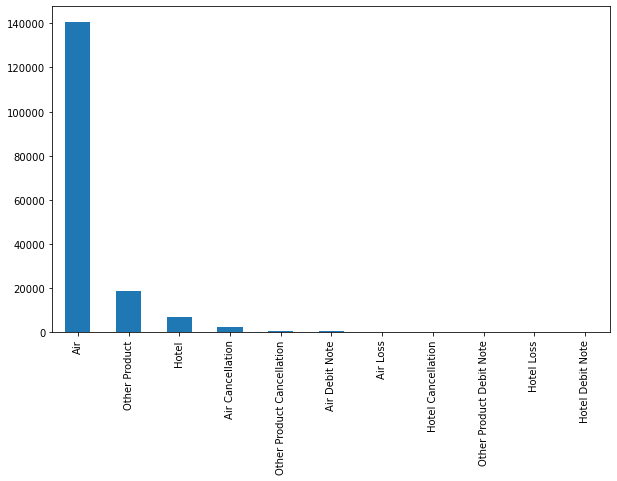

In [40]:
index_outlier['ProductType'].value_counts().plot(kind='bar')

Create bar plot of ItineraryType ( Domestic, International)

In [41]:
index_outlier['ItineraryType'].value_counts()

Domestic         162378
International      7739
Name: ItineraryType, dtype: int64

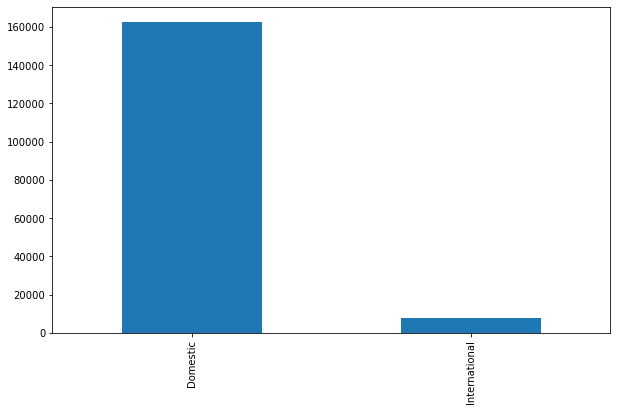

In [42]:
index_outlier['ItineraryType'].value_counts().plot(kind='bar')

### Create dummie variables of ['ProductType', 'ItineraryType']

In [43]:
dummy_df=pd.get_dummies(index_outlier, columns=['ProductType', 'ItineraryType'], drop_first=True)

In [44]:
dummy_df.columns

Index(['NetFare', 'ProductType_Air Cancellation', 'ProductType_Air Debit Note',
       'ProductType_Air Loss', 'ProductType_Hotel',
       'ProductType_Hotel Cancellation', 'ProductType_Hotel Debit Note',
       'ProductType_Hotel Loss', 'ProductType_Other Product',
       'ProductType_Other Product Cancellation',
       'ProductType_Other Product Debit Note', 'ItineraryType_International'],
      dtype='object')

In [45]:
dummy_df.rename(columns = {'NetFare':'NetFare','ProductType_Air Cancellation':'ProTypeAirCanc','ProductType_Air Debit Note':'ProTypeAirDebtNote','ProductType_Air Loss':'ProTypeAirLoss','ProductType_Hotel':'ProTypeHot','ProductType_Hotel Cancellation':'ProTypeHotCanc','ProductType_Hotel Debit Note':'ProTypeHotDebNote','ProductType_Hotel Loss':'ProTypeHotLoss','ProductType_Other Product':'ProTypeOthPro','ProductType_Other Product Cancellation':'ProTypeOthProCanc','ProductType_Other Product Debit Note':'ProTypeOthProDebNote','ItineraryType_International':'IteTypeInter'}, inplace=True)


In [48]:
dummy_df

,NetFare,ProTypeAirCanc,ProTypeAirDebtNote,ProTypeAirLoss,ProTypeHot,ProTypeHotCanc,ProTypeHotDebNote,ProTypeHotLoss,ProTypeOthPro,ProTypeOthProCanc,ProTypeOthProDebNote,IteTypeInter
InvoiceDate,,,,,,,,,,,,
2018-01-12 11:43:00,2160.00,0,0,0,0,0,0,0,1,0,0,0
2018-01-12 11:43:00,0.49,0,0,0,0,0,0,0,1,0,0,0
2018-01-12 13:01:00,6550.00,0,0,0,0,0,0,0,0,0,0,0
2018-01-12 13:10:00,6550.00,0,0,0,0,0,0,0,0,0,0,0
2018-11-30 14:30:00,5497.00,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-06 20:45:00,0.00,0,0,0,0,0,0,0,0,0,0,0
2019-10-06 21:39:00,9073.00,0,0,0,0,0,0,0,0,0,0,0
2019-10-06 22:18:00,2367.00,0,0,0,0,0,0,0,0,0,0,0


In [49]:
dummy_df.columns

Index(['NetFare', 'ProTypeAirCanc', 'ProTypeAirDebtNote', 'ProTypeAirLoss',
       'ProTypeHot', 'ProTypeHotCanc', 'ProTypeHotDebNote', 'ProTypeHotLoss',
       'ProTypeOthPro', 'ProTypeOthProCanc', 'ProTypeOthProDebNote',
       'IteTypeInter'],
      dtype='object')

## Analysis 

#### Correlation heatmap of dataset

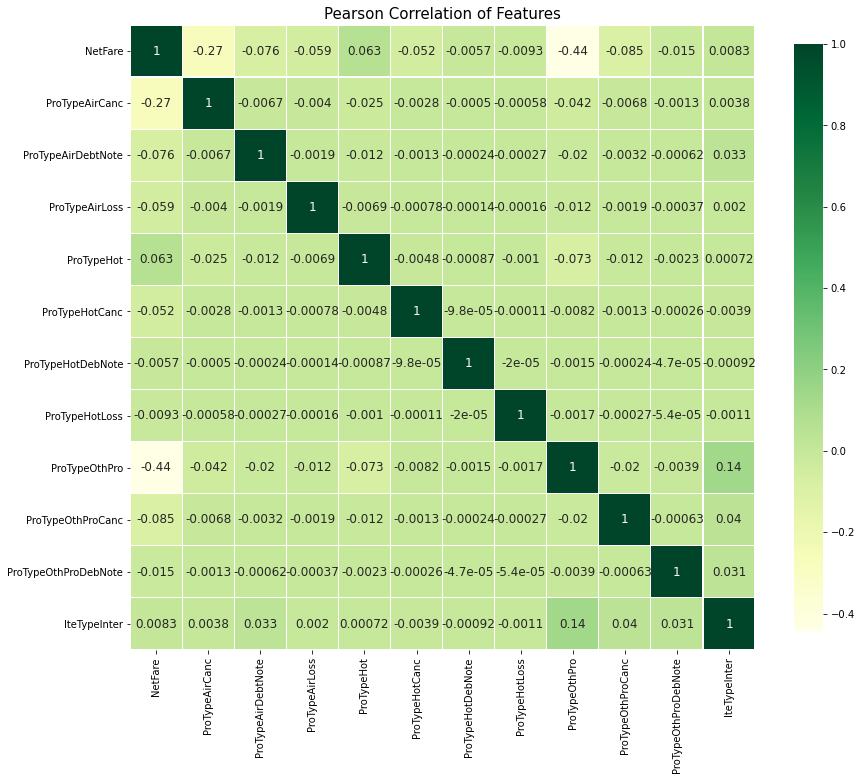

In [50]:
def correlation_heatmap(dummy_df):
    hmap , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    hmap= sns.heatmap(
        dummy_df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(dummy_df)

↑ Pearson Correlation of Features (ProductType_Hotel & ItineraryType_International) plays role to increase NetFare. Others variables less effective.

### Setting up Environment

In [51]:
import pycaret

In [52]:
from pycaret.regression import *
env= setup(data = dummy_df, target = 'NetFare')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3651
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(170117, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparing All Models

In [ ]:
#compare_models()

### Create Model

Create lenear model

In [53]:
lr = create_model('lr',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.7256,6.318042e+06,2513.5716,0.3085,1.2141,3.2688
1,1856.5897,6.282321e+06,2506.4559,0.3108,1.2119,2.8391
2,1858.6587,6.324401e+06,2514.8361,0.3159,1.2153,3.3121
Mean,1859.3247,6.308255e+06,2511.6212,0.3118,1.2138,3.1400
SD,2.5489,1.852064e+04,3.6887,0.0031,0.0014,0.2135


Create ridge model

In [54]:
ridge=create_model('ridge',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.6361,6.318183e+06,2513.5996,0.3085,1.2123,3.2819
1,1856.4489,6.282335e+06,2506.4587,0.3108,1.2100,2.8451
2,1858.5235,6.324512e+06,2514.8583,0.3159,1.2141,3.3251
Mean,1859.2028,6.308343e+06,2511.6389,0.3117,1.2121,3.1507
SD,2.5712,1.857121e+04,3.6988,0.0031,0.0017,0.2168


Create Least Angle Regression model

In [55]:
lar=create_model('lar',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.7256,6.318042e+06,2513.5716,0.3085,1.2141,3.2688
1,1856.5897,6.282321e+06,2506.4559,0.3108,1.2119,2.8391
2,1858.6587,6.324401e+06,2514.8361,0.3159,1.2153,3.3121
Mean,1859.3247,6.308255e+06,2511.6212,0.3118,1.2138,3.1400
SD,2.5489,1.852064e+04,3.6887,0.0031,0.0014,0.2135


###  Tune Model

Tuned model of Lenear regression

In [56]:
tuned_lr = tune_model('lr',fold=3)
tuned_lr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.7256,6.318042e+06,2513.5716,0.3085,1.2141,3.2688
1,1856.5897,6.282321e+06,2506.4559,0.3108,1.2119,2.8391
2,1858.6587,6.324401e+06,2514.8361,0.3159,1.2153,3.3121
Mean,1859.3247,6.308255e+06,2511.6212,0.3118,1.2138,3.1400
SD,2.5489,1.852064e+04,3.6887,0.0031,0.0014,0.2135


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Tuned model of ridge regression

In [57]:
tuned_ridge = tune_model('ridge',fold=3)
tuned_ridge

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.6457,6.318126e+06,2513.5883,0.3085,1.2122,3.2780
1,1856.4863,6.282309e+06,2506.4535,0.3108,1.2107,2.8433
2,1858.5567,6.324465e+06,2514.8490,0.3159,1.2144,3.3212
Mean,1859.2296,6.308300e+06,2511.6303,0.3118,1.2124,3.1475
SD,2.5592,1.855982e+04,3.6965,0.0031,0.0015,0.2158


Ridge(alpha=0.6970000000000001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=3651, solver='auto', tol=0.001)

Tuned model of Least Angle Regression regression

In [58]:
tuned_lar = tune_model('lar',fold=3)
tuned_lar

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.7256,6.318042e+06,2513.5716,0.3085,1.2141,3.2688
1,1856.5897,6.282321e+06,2506.4559,0.3108,1.2119,2.8391
2,1858.6587,6.324401e+06,2514.8361,0.3159,1.2153,3.3121
Mean,1859.3247,6.308255e+06,2511.6212,0.3118,1.2138,3.1400
SD,2.5489,1.852064e+04,3.6887,0.0031,0.0014,0.2135


Lars(copy_X=True, eps=0.05, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=False, precompute='auto', verbose=False)

### Model Ensembling

Combined model of all tuned

In [59]:
blender = blend_models(estimator_list = [lr, ridge, lar],fold=3)
blender

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1862.6857,6.318071e+06,2513.5774,0.3085,1.2135,3.2732
1,1856.5366,6.282302e+06,2506.4521,0.3108,1.2114,2.8411
2,1858.6083,6.324422e+06,2514.8403,0.3159,1.2149,3.3164
Mean,1859.2769,6.308265e+06,2511.6232,0.3118,1.2133,3.1436
SD,2.5545,1.854068e+04,3.6927,0.0031,0.0015,0.2146


VotingRegressor(estimators=[('Linear Regression_0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=3651, solver='auto',
                                   tol=0.001)),
                            ('Least Angle Regression_2',
                             Lars(copy_X=True, eps=2.220446049250313e-16,
                                  fit_intercept=True, fit_path=True,
                                  n_nonzero_coefs=500, normalize=True,
                                  precompute='auto', verbose=False))],
                n_jobs=None, weights=None)

### Model Analysis

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

#### 4.1 Residual Plot

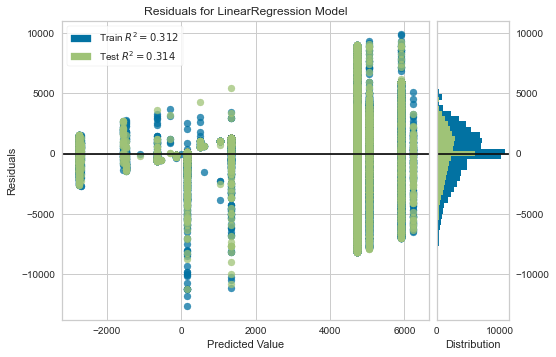

In [60]:
plot_model(tuned_lr)

#### 4.2 Recursive Feat. Selection

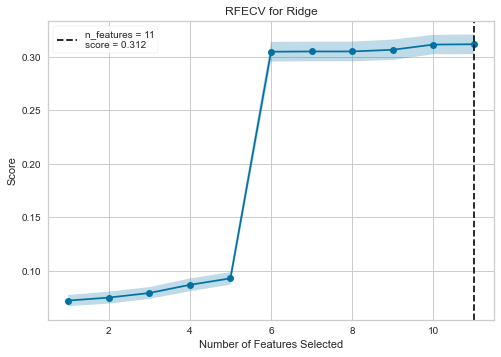

In [61]:
plot_model(tuned_ridge, plot='rfe')

#### 4.3 Prediction Error Plot

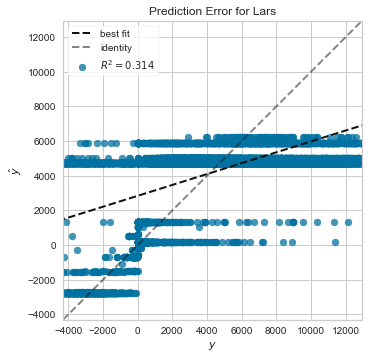

In [62]:
plot_model(tuned_lar, plot = 'error')

#### 4.4 Feature Importance Plot

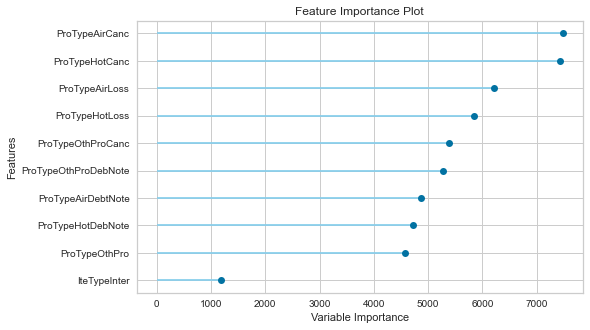

In [63]:
plot_model(tuned_lar, plot = 'feature')

## Predict on Test / Hold-out Sample

In [64]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1856.6937,6.320129e+06,2513.9866,0.3135,1.2216,2.9147


The RMSE on the test/hold-out set is 2513.98 compared to 2513.57 achieved on tuned_lr NetFare results.This is not a significant difference.

## Finalize Model for Deployment

In [65]:
final_model_linear_reg = finalize_model(tuned_lr)

In [66]:
print(final_model_linear_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [67]:
predict_model(final_model_linear_reg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1856.5107,6.319608e+06,2513.8831,0.3136,1.223,2.9222


## Predict on Unseen Data

In [68]:
data = dummy_df.sample(frac=0.8, random_state=786)
data_unseen = dummy_df.drop(data.index)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (136094, 12)
Unseen Data For Predictions: (8963, 12)


In [70]:
unseen_predictions = predict_model(final_model_linear_reg, data=data_unseen)
unseen_predictions.head(50)

,NetFare,ProTypeAirCanc,ProTypeAirDebtNote,ProTypeAirLoss,ProTypeHot,ProTypeHotCanc,ProTypeHotDebNote,ProTypeHotLoss,ProTypeOthPro,ProTypeOthProCanc,ProTypeOthProDebNote,IteTypeInter,Label
0,10.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
1,10.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
2,350.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
3,350.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
4,8232.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296
5,6566.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296
6,4231.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296
7,10.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
8,7392.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296
9,7987.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296


## Saving the Model

In [71]:
save_model(final_model_linear_reg,'final_model_linear_reg_03Jun2020')

Transformation Pipeline and Model Succesfully Saved


## Loading the Saved Model

In [72]:
saved_final_linear_reg = load_model('final_model_linear_reg_03Jun2020')

Transformation Pipeline and Model Sucessfully Loaded


In [ ]:
#new_prediction = predict_model(saved_final_linear_reg, data=[0,1,0,0,0,0,1,0,0,1,1])
#data_unseen1=[0,1,0,0,0,0,1,0,0,1,1]

In [73]:
new_prediction = predict_model(final_model_linear_reg, data=data_unseen)#data_unseen

In [74]:
new_prediction.head()

,NetFare,ProTypeAirCanc,ProTypeAirDebtNote,ProTypeAirLoss,ProTypeHot,ProTypeHotCanc,ProTypeHotDebNote,ProTypeHotLoss,ProTypeOthPro,ProTypeOthProCanc,ProTypeOthProDebNote,IteTypeInter,Label
0,10.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
1,10.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
2,350.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
3,350.0,0,0,0,0,0,0,0,1,0,0,0,151.1592
4,8232.0,0,0,0,0,0,0,0,0,0,0,0,4722.6296


---------------------xxxxxxxxxx----------------------------xxxxxxxxxxxxx------------------------xxxxxxxxxxx------------------

### Plot Graph

In [75]:
Train= dummy_df[0:136100] 
Test= dummy_df[136101:170117]

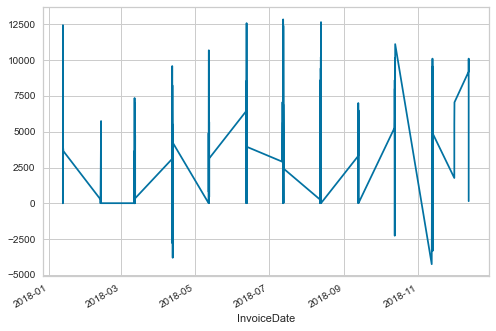

In [76]:
dummy_df[0:500].NetFare.plot(kind='line')        
                           

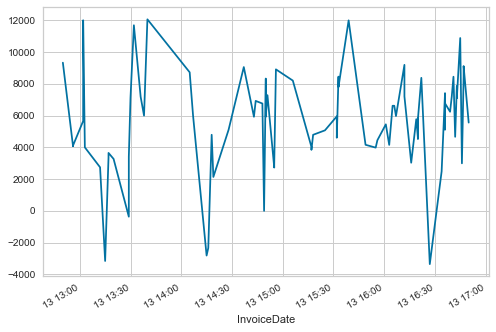

In [77]:
dummy_df[140100:140200].NetFare.plot(kind='line')

In [78]:
##################### Exponential ##############################
import statsmodels.formula.api as smf 

linear_model = smf.ols('NetFare~ProTypeOthPro',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['ProTypeOthPro'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['NetFare'])-np.array(pred_linear))**2))
rmse_linear

3217.0766599232775

In [79]:
##################### Exponential ##############################

Exp = smf.ols('NetFare~IteTypeInter',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['IteTypeInter'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['NetFare'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

inf

In [80]:
#################### Quadratic ###############################

Quad = smf.ols('NetFare~ProTypeOthPro+IteTypeInter',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["ProTypeOthPro","IteTypeInter"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['NetFare'])-np.array(pred_Quad))**2))
rmse_Quad

3215.8925731475933

In [81]:
################### Additive seasonality ########################

add_sea = smf.ols('NetFare~ProTypeAirCanc+ProTypeAirDebtNote+ProTypeAirLoss+ProTypeHot+ProTypeHotCanc+ProTypeHotDebNote+ProTypeHotLoss+ProTypeOthProCanc+ProTypeOthProDebNote',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['ProTypeAirCanc','ProTypeAirDebtNote','ProTypeAirLoss','ProTypeHot','ProTypeHotCanc','ProTypeHotDebNote','ProTypeHotLoss','ProTypeOthProCanc','ProTypeOthProDebNote']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['NetFare'])-np.array(pred_add_sea))**2))
rmse_add_sea

3332.1586288304998

In [82]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('NetFare~ProTypeOthPro+IteTypeInter+ProTypeAirCanc+ProTypeAirDebtNote+ProTypeAirLoss+ProTypeHot+ProTypeHotCanc+ProTypeHotDebNote+ProTypeHotLoss+ProTypeOthProCanc+ProTypeOthProDebNote',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['ProTypeAirCanc','ProTypeAirDebtNote','ProTypeAirLoss','ProTypeHot','ProTypeHotCanc','ProTypeHotDebNote','ProTypeHotLoss','ProTypeOthProCanc','ProTypeOthProDebNote','ProTypeOthPro','IteTypeInter']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['NetFare'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

3126.221819301704

In [83]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,3217.076660
1,rmse_Exp,inf
2,rmse_Quad,3215.892573
3,rmse_add_sea,3332.158629
4,rmse_add_sea_quad,3126.221819
